In [2]:
import time
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from typing import Callable
%matplotlib inline


In [3]:
def map_and_join(func: Callable, image):
    b, g, r = cv.split(img)

    return cv.merge([func(b), func(g), func(r)])

In [4]:
def get_histogram(img: np.array):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    return img.flatten(), cdf_normalized

def plot_histogram(flat_image, cdf_normalized, plot):

    plot.plot(cdf_normalized, color = 'b')
    plot.hist(img.flatten(),256,[0,256], color = 'r')
    plot.legend(('cdf','histogram'), loc = 'upper left')


In [5]:
def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv.LUT(image, table)

In [24]:
img = cv.imread('16626.png')

equ = map_and_join(cv.equalizeHist, img)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = map_and_join(clahe.apply, img)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = map_and_join(clahe.apply, img)


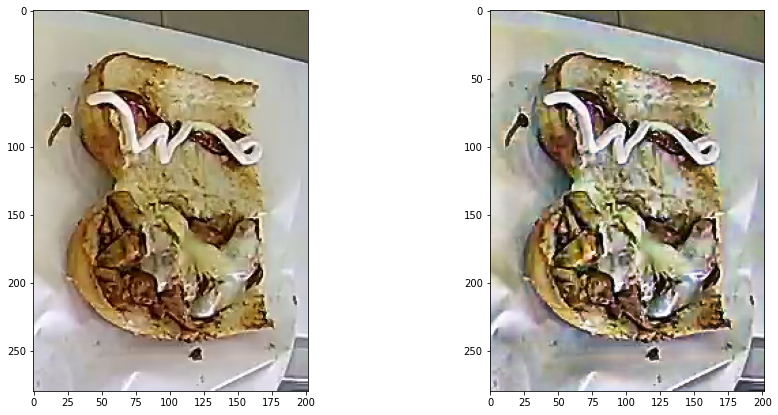

In [25]:
# create figure
fig = plt.figure(figsize=(15, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
imgplot = plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# fig.add_subplot(rows, columns, 2)
# imgplot = plt.imshow(cv.cvtColor(equ, cv.COLOR_BGR2RGB))

fig.add_subplot(rows, columns, 2)
imgplot = plt.imshow(cv.cvtColor(cl1, cv.COLOR_BGR2RGB))

# fig.add_subplot(rows, columns, 4)
# imgplot = plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


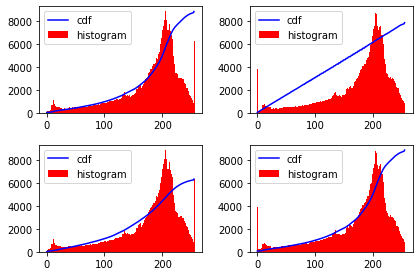

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=2)
fig.tight_layout()

plot_histogram(*get_histogram(img), plot=axs[0,0])

plot_histogram(*get_histogram(equ), plot=axs[0,1])

plot_histogram(*get_histogram(cl1), plot=axs[1,0])

plot_histogram(*get_histogram(img), plot=axs[1,1])
plt.show()

In [9]:
images = []
for gamma in np.arange(0.0, 3.5, 0.5):
    # ignore when gamma is 1 (there will be no change to the image)
    if gamma == 1: continue
    # apply gamma correction and show the images
    gamma = gamma if gamma > 0 else 0.1
    adjusted = adjust_gamma(img, gamma=gamma)
    images.append((adjusted, gamma))

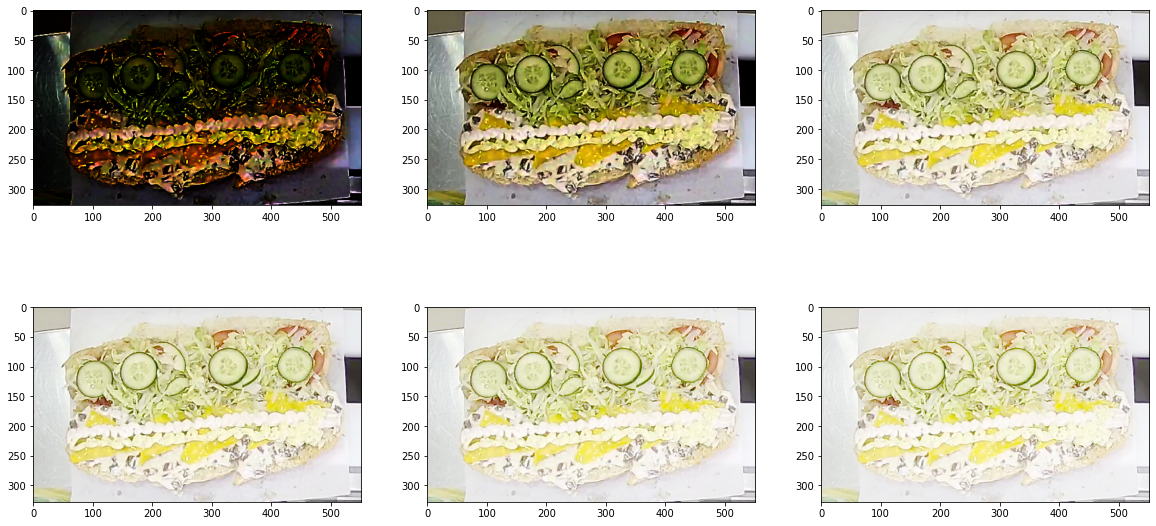

In [10]:
# create figure
fig = plt.figure(figsize=(20, 10))
  
# setting values to rows and column variables
rows = 2
columns = 3

for index, ret in enumerate(images): 
    image, gamma = ret
    fig.add_subplot(rows, columns, index+1)
    imgplot = plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    # plt.text(f'gamma {gamma}', fontsize=14, fontweight='bold')